#Converts polygons to pixels

In [26]:
#Imports
import cv2
import json
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [27]:
json_filename = 'train_annotations.json'
read_file = open(json_filename, "r") 
data = json.load(read_file)

annotations = []
#[f"train_{index}.tif"]

for index in data["images"]:
    polys=[]
    for polygons in index["annotations"]:
        geom = np.array(polygons['segmentation'])
        polys.append(geom)
    annotations.append(polys)
print(f"Number of annotations:{len(annotations)}")

Number of annotations:176


(146,)
(146,)
(146,)


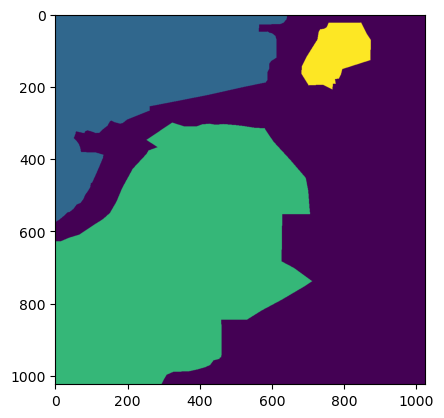

In [43]:
#Test mask
shape = (1024, 1024)
Image.MAX_IMAGE_PIXELS = None
img = Image.new('L', (shape[1], shape[0]), 0)  # (w, h)
for i in range(len(annotations[0])):
    print(annotations[0][0].shape)
    poly = annotations[0][i]
    points = list(zip(poly[::2], poly[1::2]))
    for point in range(len(points)):
        last= points[point][1]
        first= points[point][0]
        points[point]=(first,1024-last)
    ImageDraw.Draw(img).polygon(points, outline=i + 1, fill=i + 1)

mask_2 = np.array(img)
plt.imshow(mask_2)